In [2]:
using Revise

using DynamicalSystems
using JLD2

In [3]:
lorenz = Systems.lorenz(;ρ=28)

3-dimensional continuous dynamical system
 state:       [0.0, 10.0, 0.0]
 rule f:      loop
 in-place?    false
 jacobian:    loop_jac
 parameters:  [10.0, 28.0, 2.66667]

In [4]:
Δt = 0.01
ts = trajectory(lorenz, 100000*Δt;Δt = Δt, Ttr=200)

3-dimensional Dataset{Float64} with 100001 points
 10.3395   16.1167   20.5527
 10.9174   16.6819   21.7332
 11.4891   17.1425   23.0328
 12.0442   17.4714   24.4384
 12.5703   17.6425   25.9301
 13.054    17.6317   27.4805
 13.481    17.4202   29.0551
 13.8371   16.9964   30.6134
 14.1085   16.3581   32.1108
 14.2834   15.5141   33.5015
  ⋮                  
  1.36195   2.5267    9.47983
  1.48415   2.76518   9.26752
  1.61857   3.02823   9.06798
  1.76653   3.31834   8.88234
  1.92943   3.63824   8.71201
  2.10883   3.9909    8.55874
  2.30643   4.3795    8.42466
  2.52409   4.80747   8.31241
  2.76381   5.27846   8.2252

In [5]:
using Plots

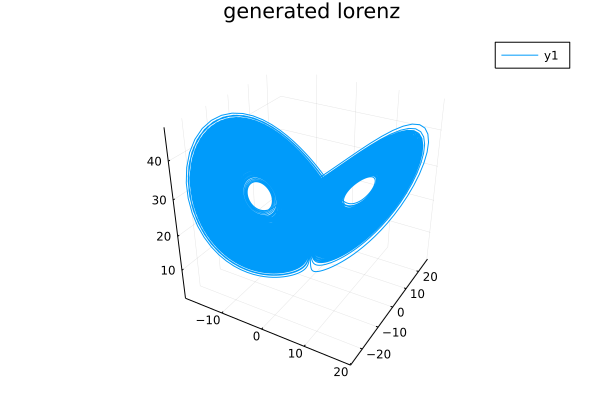

In [6]:
tseries = Matrix(ts)
p = plot3d(tseries[:,1], tseries[:,2], tseries[:,3], title="generated lorenz")
display(p)


In [7]:
function gen_path(exp::String, ρ; eval=true)::Tuple{String,String}
    save_rep = "data/$exp"
    save_file = "/$(exp)_$ρ.jld2"
    if eval
        save_rep = "../"*save_rep
    end
    return save_rep, save_file
end

a,b = gen_path("lorenz", 0)


("../data/lorenz", "/lorenz_0.jld2")

In [8]:
function save_series(ts::AbstractMatrix,save_rep::String, save_file::String; opt_info=[])
    save_dict = Dict{String,Any}("time series"=>ts)
    save_path = save_rep*save_file
    if length(opt_info)>0
        for info in opt_info
            merge!(save_dict, Dict(info[1]=>info[2]))
        end
    end
    mkpath(save_rep)
    save(save_path, save_dict)
    return
end

save_series(tseries, gen_path("lorenz",28)...;opt_info=[("ρ",28)])

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [13]:
using Flux
using BPTT

function load_data(path::String, name::String; device = cpu)
    data_dict = load(path)
    X = Float32.(data_dict["time series"]) |> device
    if "par" in keys(data_dict)
        par = data_dict["par"]
    else
        par = nothing
    end

    return Dataset(X, name), par
end

load_data("../data/lorenz/lorenz_25.jld2","name")

(BPTT.Dataset{Matrix{Float32}}(Float32[-2.1958146 -3.590218 17.149218; -2.3354049 -3.7357292 16.77984; … ; 1.8583326 0.5721335 20.180637; 1.740033 0.6572613 19.660492], "name"), 25)

100001×3 Matrix{Float64}:
 -2.19581  -3.59022   17.1492
 -2.3354   -3.73573   16.7798
 -2.47644  -3.89962   16.4289
 -2.62057  -4.08245   16.097
 -2.76932  -4.28481   15.7846
 -2.92414  -4.50739   15.4927
 -3.08642  -4.75093   15.2223
 -3.25747  -5.0162    14.9746
 -3.43858  -5.30403   14.751
 -3.63097  -5.61523   14.5533
  ⋮                   
  3.39261   0.130906  24.2643
  3.08366   0.163388  23.6305
  2.80795   0.210806  23.014
  2.56356   0.269656  22.4148
  2.34847   0.337137  21.8323
  2.1606    0.411067  21.2661
  1.99789   0.489798  20.7157
  1.85833   0.572133  20.1806
  1.74003   0.657261  19.6605